In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [ ]:
ridge_results = pd.read_csv("", index_col="Unnamed: 0")
lasso_results = pd.read_csv("", index_col="Unnamed: 0")
svm_results = pd.read_csv("", index_col="Unnamed: 0")

xgboost_results = pd.read_csv("v", index_col="Unnamed: 0")

mlp_results = pd.read_csv("", index_col="Unnamed: 0")
transmlp_results = pd.read_csv("", index_col="Unnamed: 0")


In [282]:
transmlp_results

,0,1,2,3,4
fold,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
train_score,-9.430000e+22,-8.440000e+22,-2.270000e+23,-1.580000e+23,-8.600000e+22
test_score,-1.340000e+24,-6.750000e+23,-2.780000e+24,-1.390000e+24,-8.120000e+23
train_mean_pearson,5.984477e-01,6.192895e-01,4.672299e-01,5.241388e-01,5.326771e-01
test_mean_pearson,1.023447e-01,1.499081e-01,8.836607e-02,1.103049e-01,1.249343e-01
train_rmse,1.028285e+00,1.011907e+00,1.182127e+00,1.105300e+00,1.133123e+00
test_rmse,1.489054e+00,1.550792e+00,1.546894e+00,1.495555e+00,1.463708e+00


In [181]:
np.mean(ridge_results.loc["train_rmse"]) - np.mean(ridge_results.loc["test_rmse"])

np.float64(-0.11003406199629939)

Text(0, 0.5, "Pearson's Correlation")

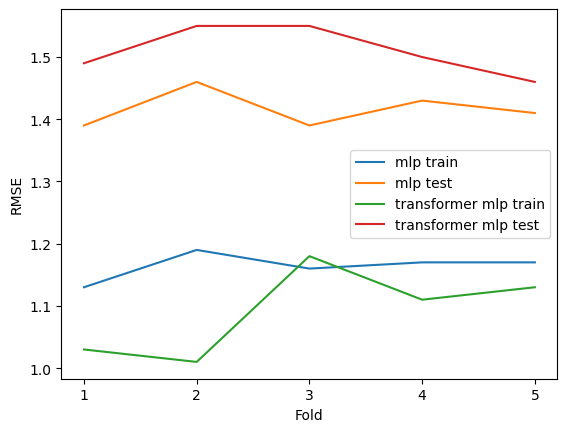

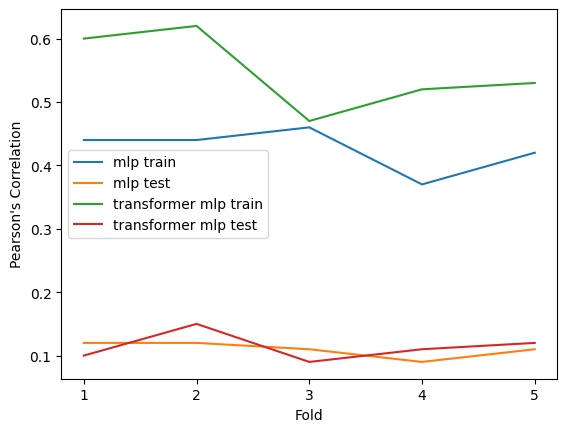

In [277]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()
ax.plot(mlp_results.loc['fold'], np.round(mlp_results.loc['train_rmse'].astype(float), 2))
ax.plot(mlp_results.loc['fold'], np.round(mlp_results.loc['test_rmse'].astype(float), 2))
ax.plot(transmlp_results.loc['fold'], np.round(transmlp_results.loc['train_rmse'].astype(float), 2))
ax.plot(transmlp_results.loc['fold'], np.round(transmlp_results.loc['test_rmse'].astype(float), 2))
# ax.plot(svm_results.loc['fold'], np.round(svm_results.loc['train_rmse'].astype(float), 2))
# ax.plot(svm_results.loc['fold'], np.round(svm_results.loc['test_rmse'].astype(float), 2))
ax.legend(['mlp train', 'mlp test', 'transformer mlp train', 'transformer mlp test'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Fold')
ax.set_ylabel('RMSE')

fig, ax = plt.subplots()
ax.plot(mlp_results.loc['fold'], np.round(mlp_results.loc['train_mean_pearson'].astype(float), 2))
ax.plot(mlp_results.loc['fold'], np.round(mlp_results.loc['test_mean_pearson'].astype(float), 2))
ax.plot(transmlp_results.loc['fold'], np.round(transmlp_results.loc['train_mean_pearson'].astype(float), 2))
ax.plot(transmlp_results.loc['fold'], np.round(transmlp_results.loc['test_mean_pearson'].astype(float), 2))
# ax.plot(svm_results.loc['fold'], np.round(svm_results.loc['train_mean_pearson'].astype(float), 2))
# ax.plot(svm_results.loc['fold'], np.round(svm_results.loc['test_mean_pearson'].astype(float), 2))
ax.legend(['mlp train', 'mlp test', 'transformer mlp train', 'transformer mlp test'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Fold')
ax.set_ylabel('Pearson\'s Correlation')

In [ ]:
import seaborn as sns
fold1_pred = pd.read_csv("", index_col="Unnamed: 0")
fold2_pred = pd.read_csv("", index_col="Unnamed: 0")
fold3_pred = pd.read_csv("", index_col="Unnamed: 0")
fold4_pred = pd.read_csv("", index_col="Unnamed: 0")
fold5_pred = pd.read_csv("", index_col="Unnamed: 0")

seq_ref = pd.read_csv("")
seq_ref['patient_id'] = seq_ref['wsi_file_name'].str.split('.').str[0].str.split('-01Z').str[0]
seq_ref.set_index('patient_id', inplace=True, drop=True)
seq_ref = seq_ref.drop(['wsi_file_name', 'tcga_project'], axis=1)

# print(fold1_pred.head())
# sns.violinplot(data=fold1_pred)

In [275]:
from scipy.stats import pearsonr 

# Undoing the log transform
fold_pred_undo = np.power(2, fold5_pred) - 0.01

common = seq_ref.index.intersection(fold_pred_undo.index)
# print(common)
fold_pred_undo = fold_pred_undo.loc[common]
print(fold1_pred_undo.head())
seq_ref_undo = seq_ref.loc[common]
print(seq_ref_undo.shape)

gene_pearsons = {}
for gene in fold_pred_undo.columns:
    true_values = seq_ref_undo[gene].values
    pred_values = fold_pred_undo[gene].values

    if np.all(pred_values == pred_values[0]) or np.all(true_values == true_values[0]):
        gene_pearsons[gene] = np.nan  # Avoid constant value issues
    else:
        gene_pearsons[gene], _ = pearsonr(true_values, pred_values)

# Convert to DataFrame and save
pearson_df = pd.DataFrame(list(gene_pearsons.items()), columns=["Gene", "Pearson Correlation"])
pearson_df.to_csv("results/recomputed_gene_pearson.csv", index=False)
print(np.mean(pearson_df['Pearson Correlation']))

              rna_A1BG  rna_A1BG-AS1    rna_A2M  rna_A2M-AS1  rna_A2ML1  \
TCGA-4Z-AA7W  0.012788      0.079732  62.669661     0.270280   1.640755   
TCGA-BT-A0YX  0.010074      0.093503  34.921051     0.194299   1.664517   
TCGA-ZF-A9R7  0.014242      0.053081  20.180035     0.229207   2.237893   
TCGA-4Z-AA81  0.014030      0.105373  40.993279     0.234292   1.807174   
TCGA-FD-A3B5  0.010274      0.109813  32.506568     0.147192   2.091287   

              rna_A4GALT   rna_AAAS  rna_AACS  rna_AADAT  rna_AAGAB  ...  \
TCGA-4Z-AA7W   13.400820   9.758906  2.006482   3.767588  16.251507  ...   
TCGA-BT-A0YX   13.073442  10.002203  2.604387   1.851314  16.123026  ...   
TCGA-ZF-A9R7    9.268130  10.098041  2.537641   2.938346  16.803151  ...   
TCGA-4Z-AA81   13.194650   9.619256  2.239370   2.732605  15.505984  ...   
TCGA-FD-A3B5   13.071205  10.203352  2.940246   1.734701  16.488372  ...   

              rna_ZWILCH  rna_ZWINT  rna_ZXDA  rna_ZXDB  rna_ZXDC  rna_ZYG11A  \
TCGA-4Z-AA7

In [281]:
train_rmse_mean = np.mean(transmlp_results.loc['train_rmse'].astype(float))
train_rmse_std = np.std(transmlp_results.loc['train_rmse'].astype(float))
test_rmse_mean = np.mean(transmlp_results.loc['test_rmse'].astype(float))
test_rmse_std = np.std(transmlp_results.loc['test_rmse'].astype(float))

train_pearson_mean = np.mean(transmlp_results.loc['train_mean_pearson'].astype(float))
train_pearson_std = np.std(transmlp_results.loc['train_mean_pearson'].astype(float))
test_pearson_mean = np.mean(transmlp_results.loc['test_mean_pearson'].astype(float))
test_pearson_std = np.std(transmlp_results.loc['test_mean_pearson'].astype(float))

print(train_pearson_mean, train_pearson_std, test_pearson_mean, test_pearson_std)

0.5483566061583328 0.05468909747228232 0.11517161890191636 0.021017541281642422
